In [ ]:
%reset -f

In [7]:
# ~~~~~~~~~~~~~~ Libraries
import os
import numpy as np
from glob import glob # look for all the pathnames matching a specified pattern according to the rules
import matplotlib.pyplot as plt
import re
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle
import matplotlib.cm as cm

In [ ]:
# Set the working directory
path = "/u/kazma/MINT/data/processed/visual"
sub_folders = [f for f in os.listdir(path) if os.path.isdir(os.path.join(path, f))]
sub_folders_sorted = sorted(sub_folders, key=lambda x: int(re.search(r'\d+', x).group())) # Sort the folders based on the numeric part after "sub-"


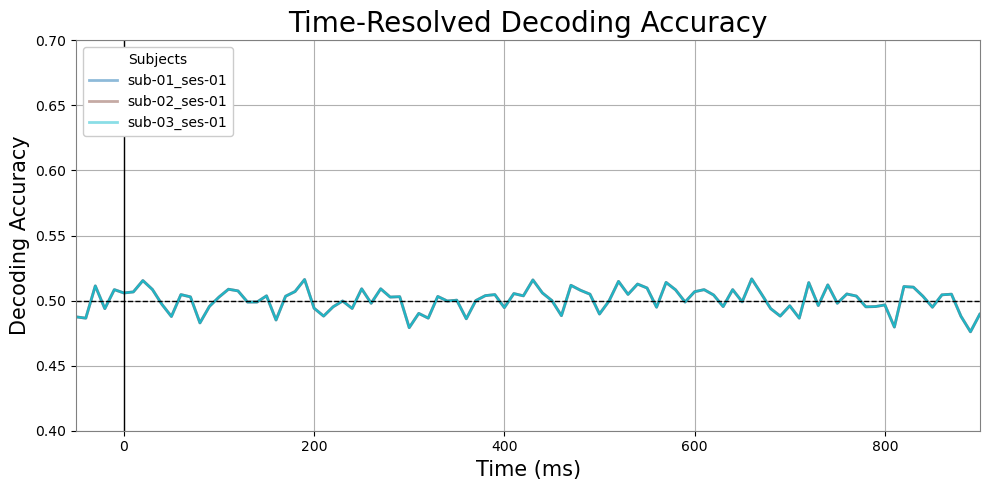

Figure saved at /u/kazma/MINT/data/processed/visual/time_resolved_decoding_accuracy.png


In [32]:

time_vector = np.arange(-100, 1002, 10)

# Create a figure to plot all subjects on the same plot
plt.figure(figsize=(10, 5))

colors = plt.cm.tab10(np.linspace(0, 1, len(sub_folders_sorted)))

# Loop through each subject folder
for idx, sub_loop in enumerate(sub_folders_sorted):
    
    # Define subject file path
    sub_filename = os.path.join(path, sub_loop, 'accuracy_matrices.pkl')

    # Load the pickle file for the subject
    with open(sub_filename, "rb") as f:
        sub_data = pickle.load(f)

    # Calculate average accuracy values for each matrix
    average_accuracies = []
    for accuracy_df in sub_data:
        matrix_values = accuracy_df.to_numpy()
        avg_accuracy = np.nanmean(matrix_values)  # np.nanmean ignores NaN values
        average_accuracies.append(avg_accuracy)

    # Plot time-resolved decoding accuracy for the subject
    plt.plot(time_vector, average_accuracies, color=colors[idx], alpha=0.5, linewidth=2, label=sub_loop)
    plt.plot(time_vector, average_accuracies, color=colors[idx], alpha=1, linewidth=1)

# Add common elements for the plot
plt.axhline(0.5, color='black', linestyle='--', linewidth=1)  # 50% chance line
plt.axvline(0, color='black', linestyle='-', linewidth=1)  # Add a vertical line at t=0
plt.xlabel("Time (ms)", size=15)
plt.ylabel("Decoding Accuracy", size=15)
plt.title("Time-Resolved Decoding Accuracy", size=20)
plt.xlim(-50, 900)
plt.ylim(0.4, 0.7)

# Set box line color to gray
ax = plt.gca()
ax.spines['top'].set_color('gray')
ax.spines['right'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_color('gray')
plt.grid()

# Add legend to distinguish subjects
plt.legend(title="Subjects", loc="upper left", bbox_to_anchor=(0, 1), framealpha=1)

# Adjust layout and display plot
plt.tight_layout()

# Save the figure
output_path = os.path.join(path, "time_resolved_decoding_accuracy.png")
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"Figure saved at {output_path}")
